In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apart_2018.csv to apart_2018 (2).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['apart_2018.csv'].decode('cp949')))
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987,언주로
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987,언주로
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987,언주로


#### Pandas 함수 모음
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [ ]:
df.loc[df["전용면적(㎡)"]<=60, '규모']="소형"
df.loc[(df["전용면적(㎡)"]>60) & (df["전용면적(㎡)"]<=85), '규모']="중형"
df.loc[(df["전용면적(㎡)"]>85) & (df["전용면적(㎡)"]<=102), '규모']="중대형"
df.loc[df["전용면적(㎡)"]>102, '규모']="대형"
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,규모
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로,중형
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로,중형
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987,언주로,중형
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987,언주로,중형
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987,언주로,소형


#### datetime 함수 모음
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
df["계약일"]=df["계약년월"].astype('str') + df["계약일"].astype('str')
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d')
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,규모
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-03,"130,000",4,1987,언주로,중형
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-08,"117,000",2,1987,언주로,중형
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-11,"130,000",1,1987,언주로,중형
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,2018-03-19,"139,500",2,1987,언주로,중형
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,2018-04-05,"107,500",5,1987,언주로,소형


In [ ]:
df['시']=df["시군구"].apply(lambda e: e.split()[0])
df['구']=df["시군구"].apply(lambda e: e.split()[1])
df['동']=df["시군구"].apply(lambda e: e.split()[2])
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,규모,시,구,동
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-03,"130,000",4,1987,언주로,중형,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-08,"117,000",2,1987,언주로,중형,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-11,"130,000",1,1987,언주로,중형,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,2018-03-19,"139,500",2,1987,언주로,중형,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,2018-04-05,"107,500",5,1987,언주로,소형,서울특별시,강남구,개포동


In [ ]:
df['거래금액(만원)'] = df['거래금액(만원)'].apply(lambda e: e.split(",")[0]+e.split(",")[1])
df['거래금액(만원)'] = df['거래금액(만원)'].convert_objects(convert_numeric=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,규모,시,구,동
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-03,130000,4,1987,언주로,중형,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-08,117000,2,1987,언주로,중형,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,2018-01-11,130000,1,1987,언주로,중형,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,2018-03-19,139500,2,1987,언주로,중형,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,2018-04-05,107500,5,1987,언주로,소형,서울특별시,강남구,개포동


In [ ]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)


In [ ]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

#### countplot 함수 모음
https://seaborn.pydata.org/generated/seaborn.countplot.html

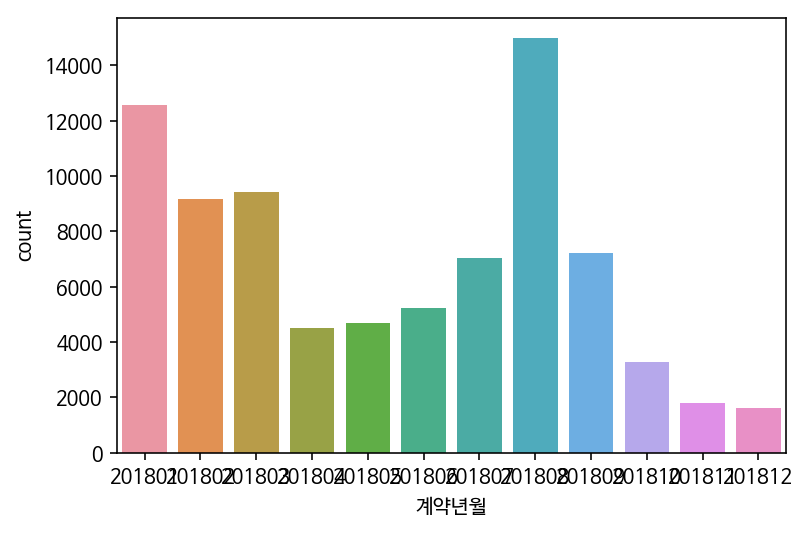

In [ ]:
sns.countplot(data=df, x="계약년월")

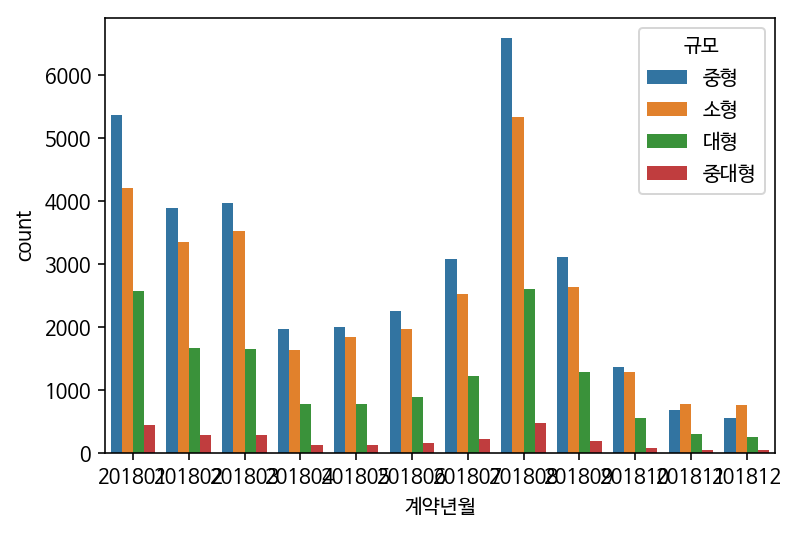

In [ ]:
sns.countplot(data=df, x="계약년월", hue="규모")

#### barplot 함수 모음
https://seaborn.pydata.org/generated/seaborn.barplot.html

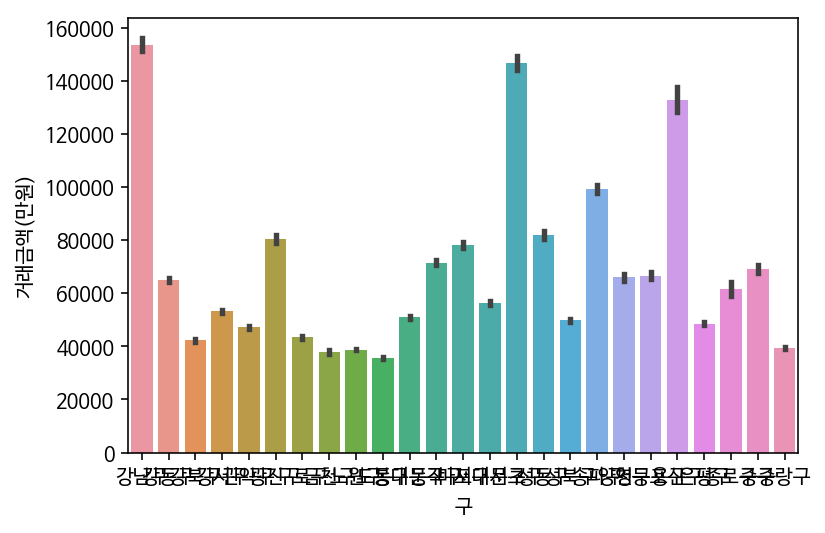

In [ ]:
sns.barplot(data=df, x="구", y="거래금액(만원)" )

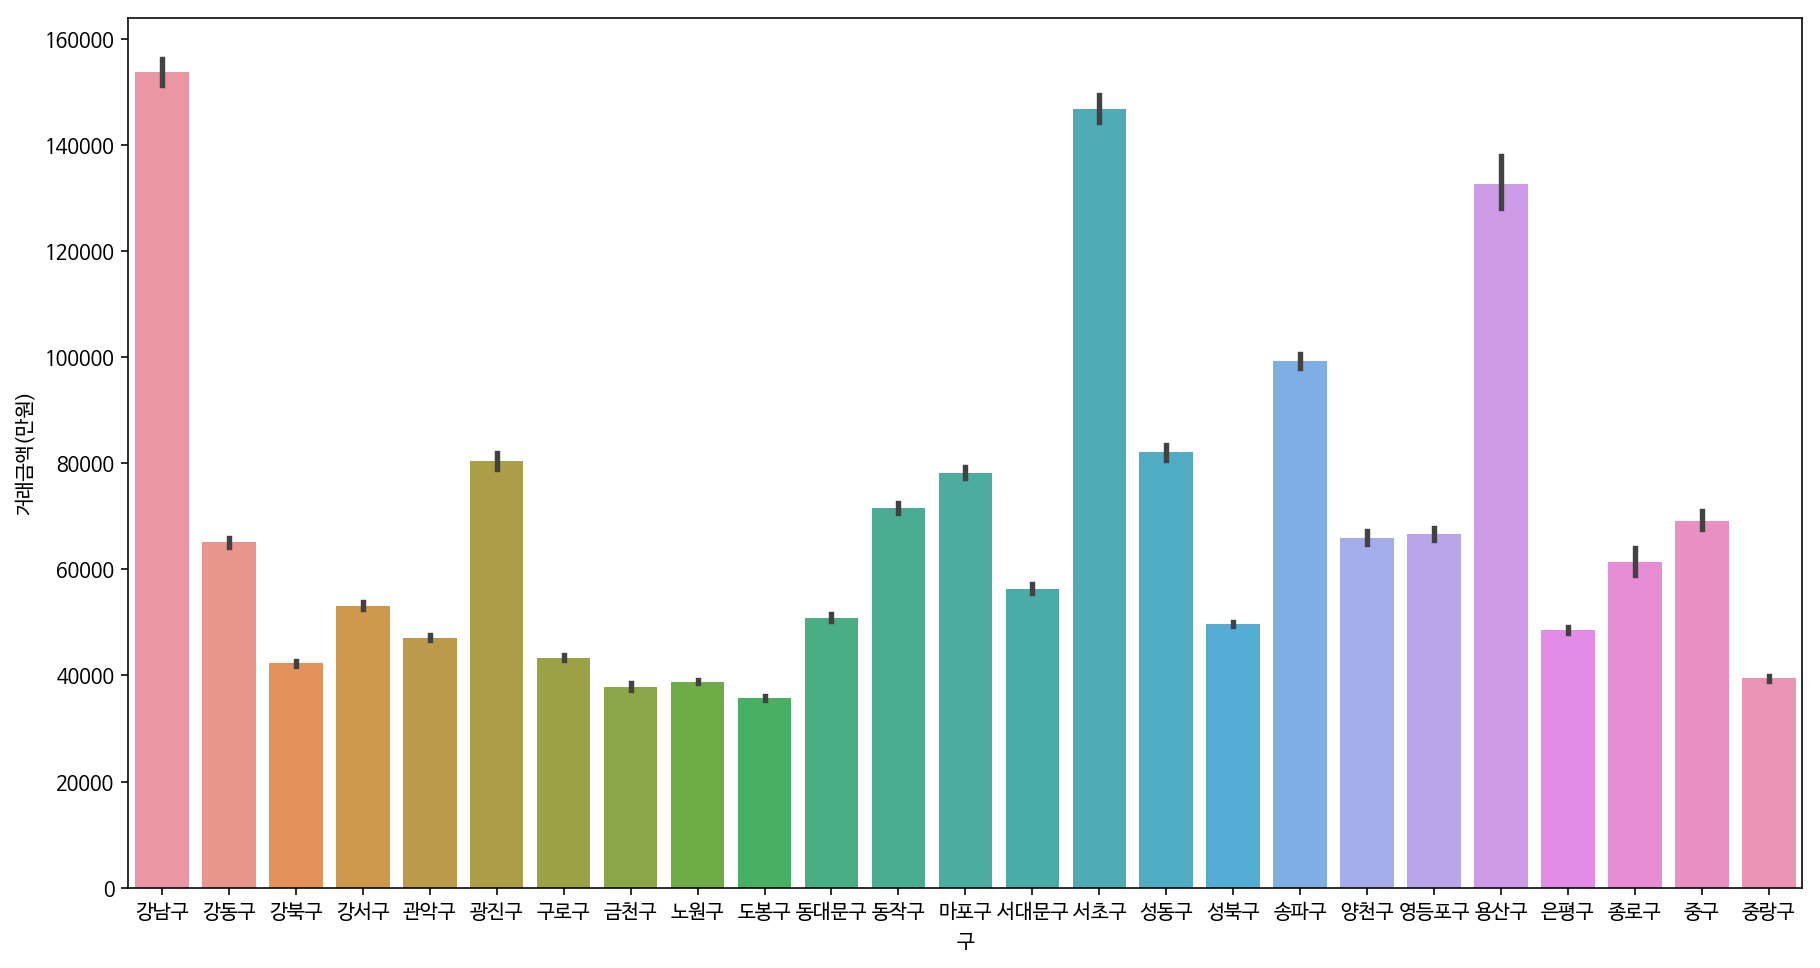

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="구", y="거래금액(만원)")

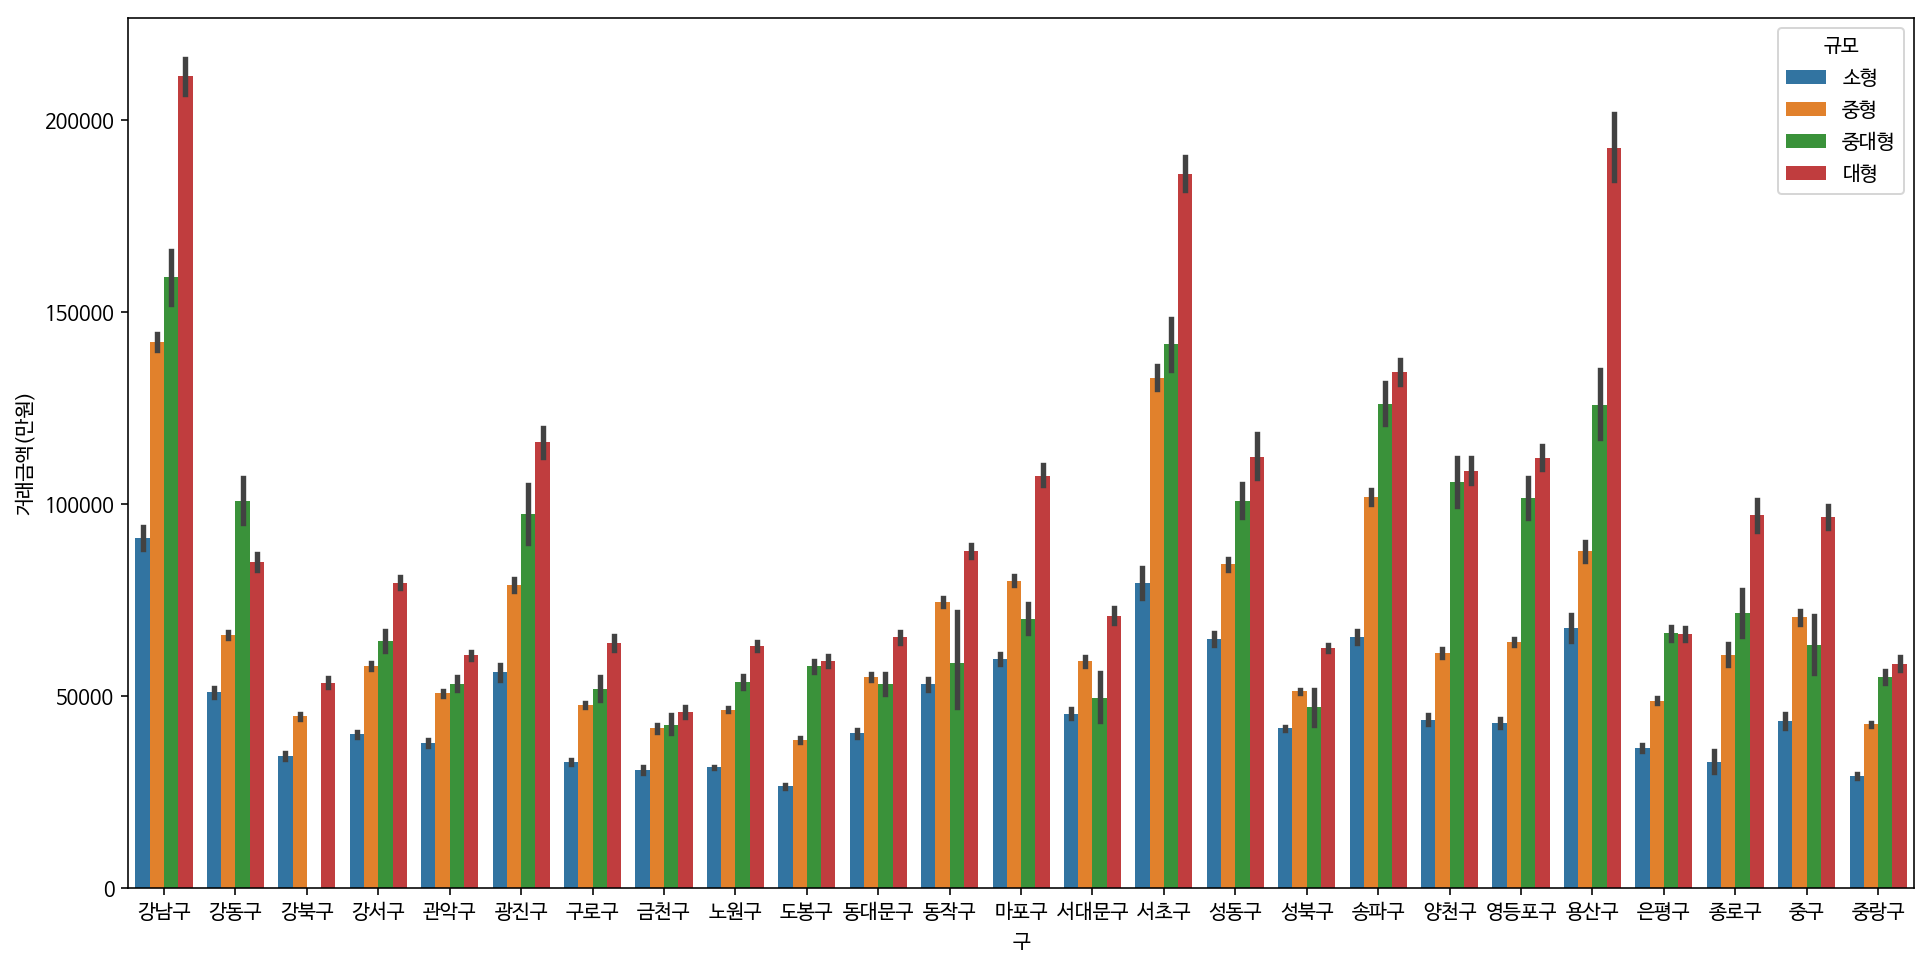

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x="구", y="거래금액(만원)", hue="규모", hue_order=["소형", "중형", "중대형", "대형"])

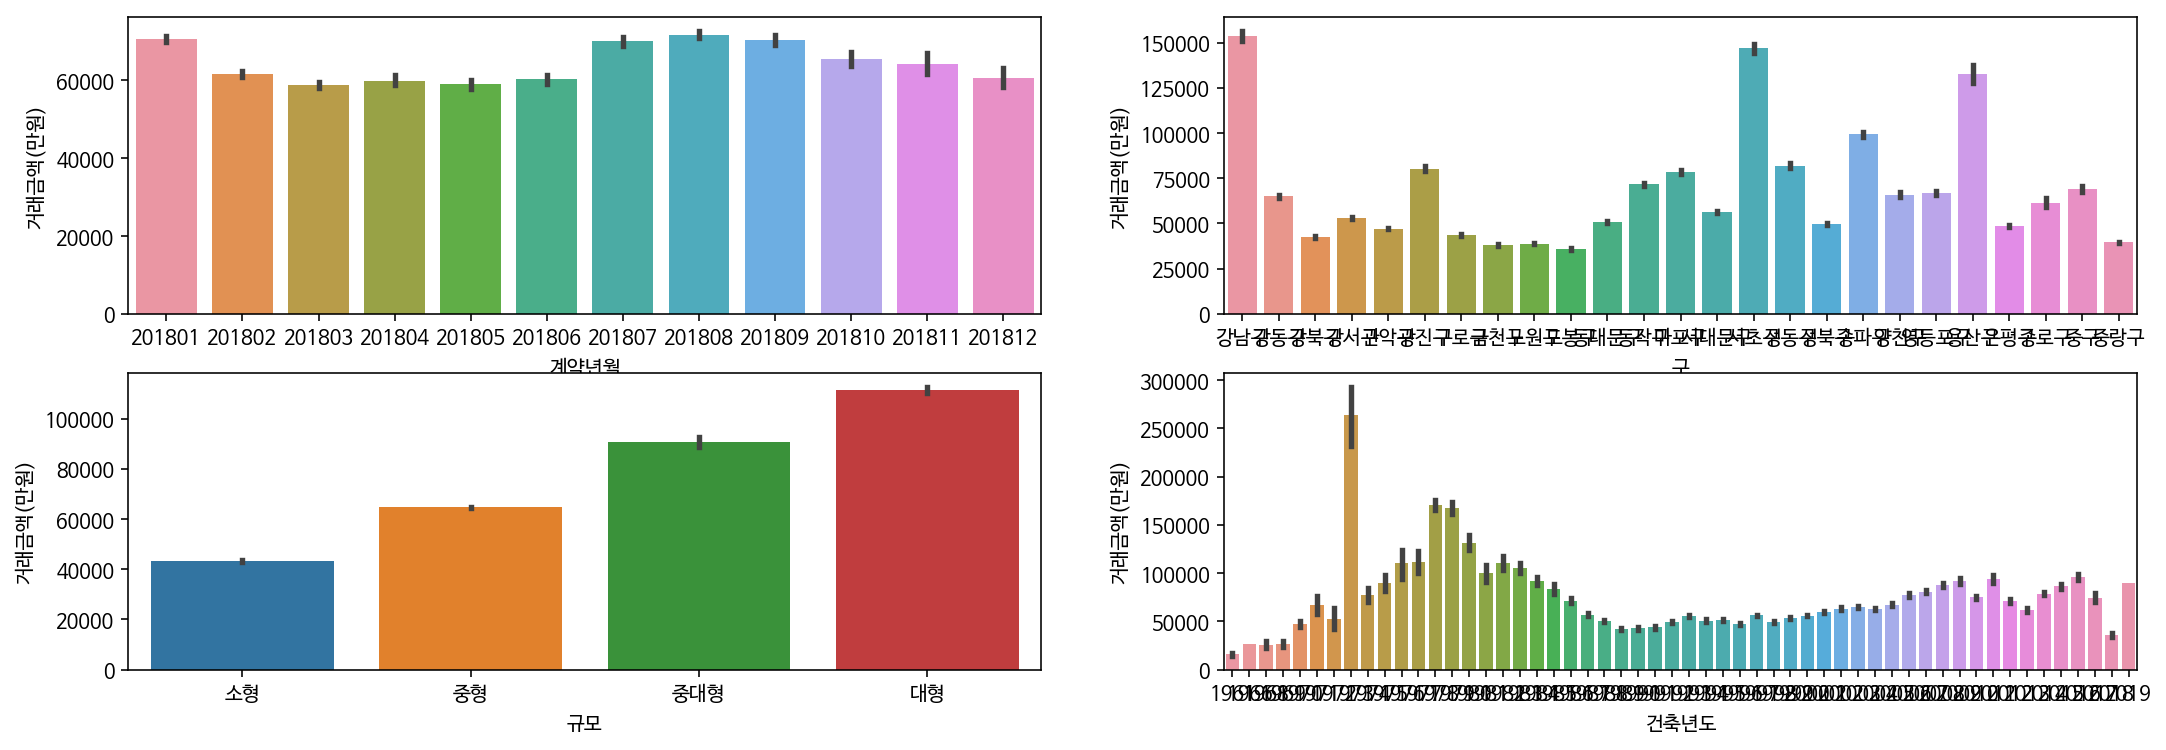

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 6)
sns.barplot(data=df, x="계약년월", y="거래금액(만원)", ax=ax1)
sns.barplot(data=df, x="구", y="거래금액(만원)", ax=ax2)
sns.barplot(data=df, x="규모", y="거래금액(만원)", order=["소형", "중형", "중대형", "대형"], ax=ax3)
sns.barplot(data=df, x="건축년도", y="거래금액(만원)", ax=ax4)

#### pointplot 함수 모음
https://seaborn.pydata.org/generated/seaborn.pointplot.html

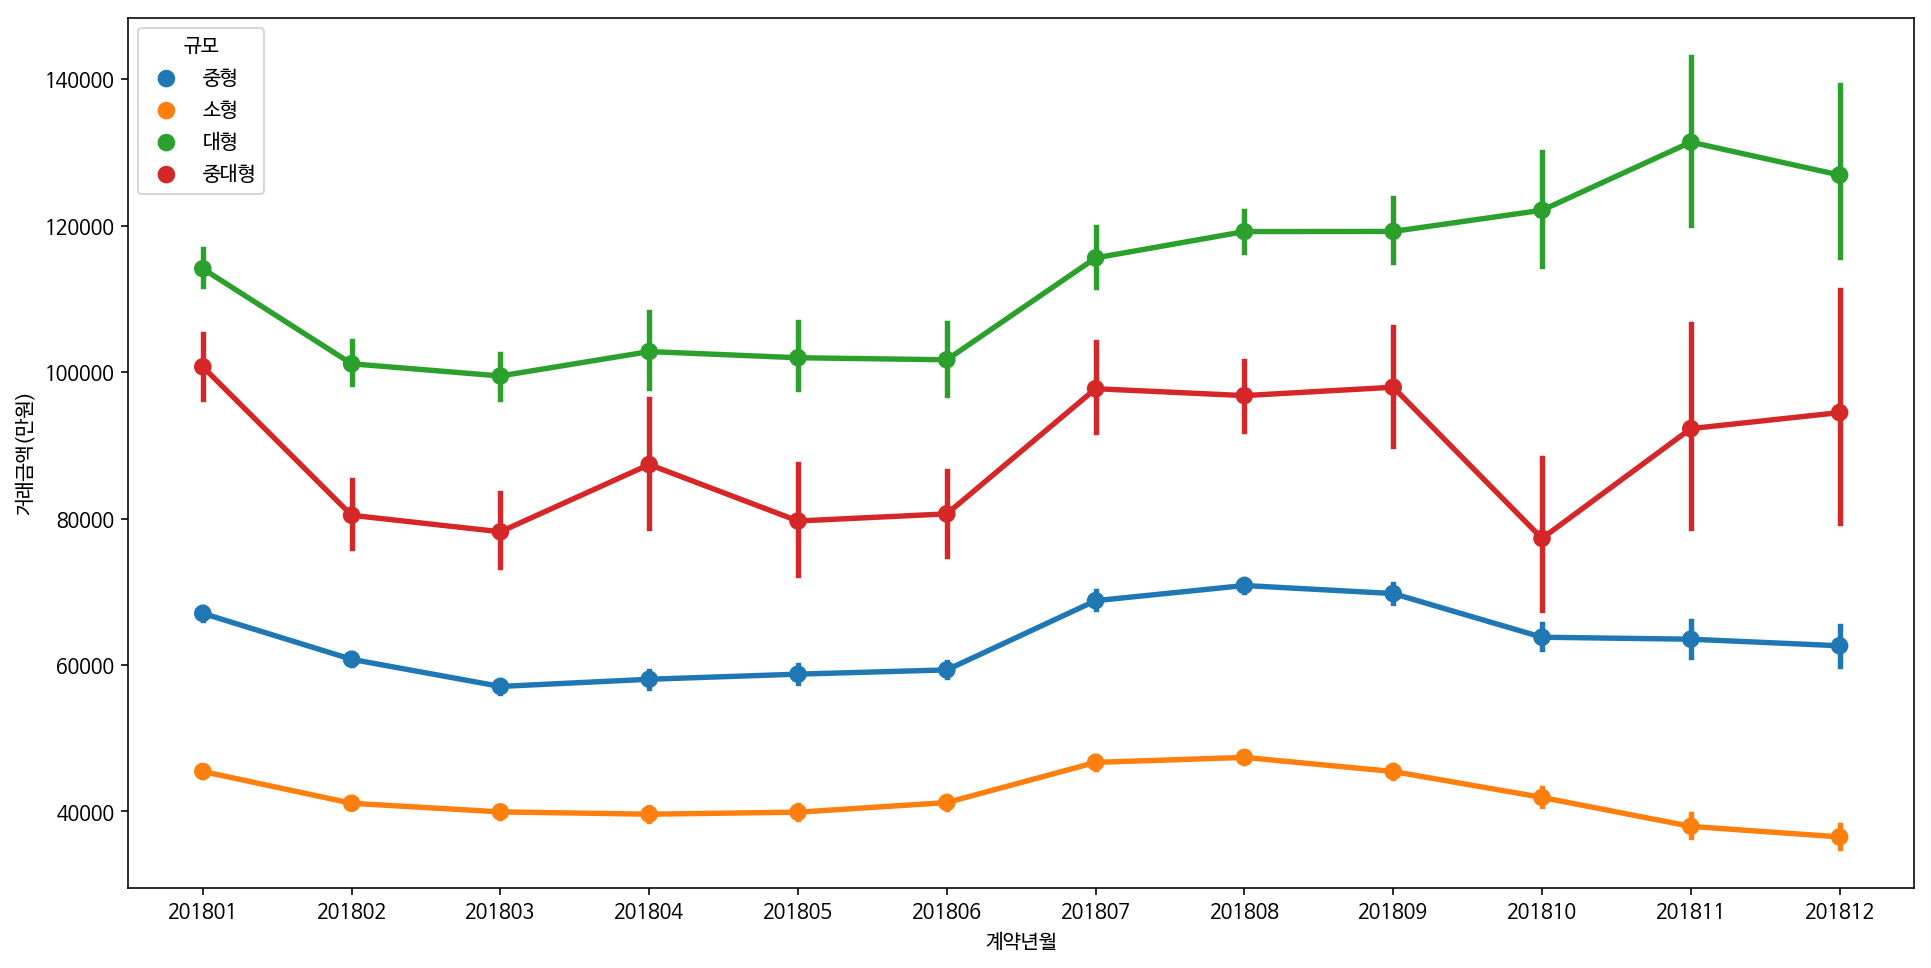

In [ ]:
plt.figure(figsize=(16,8))
sns.pointplot(data=df , x="계약년월", y="거래금액(만원)", hue="규모")

In [ ]:
df2=df[df['동']=='가락동']
df2.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,규모,시,구,동
59675,서울특별시 송파구 가락동,166-2,166,2,sk파크타워,84.35,201801,2018-01-14,63000,13,2003,오금로,중형,서울특별시,송파구,가락동
59676,서울특별시 송파구 가락동,166-2,166,2,sk파크타워,84.85,201801,2018-01-27,64000,5,2003,오금로,중형,서울특별시,송파구,가락동
59677,서울특별시 송파구 가락동,166-2,166,2,sk파크타워,84.35,201803,2018-03-26,69500,17,2003,오금로,중형,서울특별시,송파구,가락동
59678,서울특별시 송파구 가락동,166-2,166,2,sk파크타워,84.88,201804,2018-04-06,64900,3,2003,오금로,중형,서울특별시,송파구,가락동
59679,서울특별시 송파구 가락동,166-2,166,2,sk파크타워,84.88,201808,2018-08-25,67800,12,2003,오금로,중형,서울특별시,송파구,가락동


#### lmplot 함수 모음
https://seaborn.pydata.org/generated/seaborn.lmplot.html

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


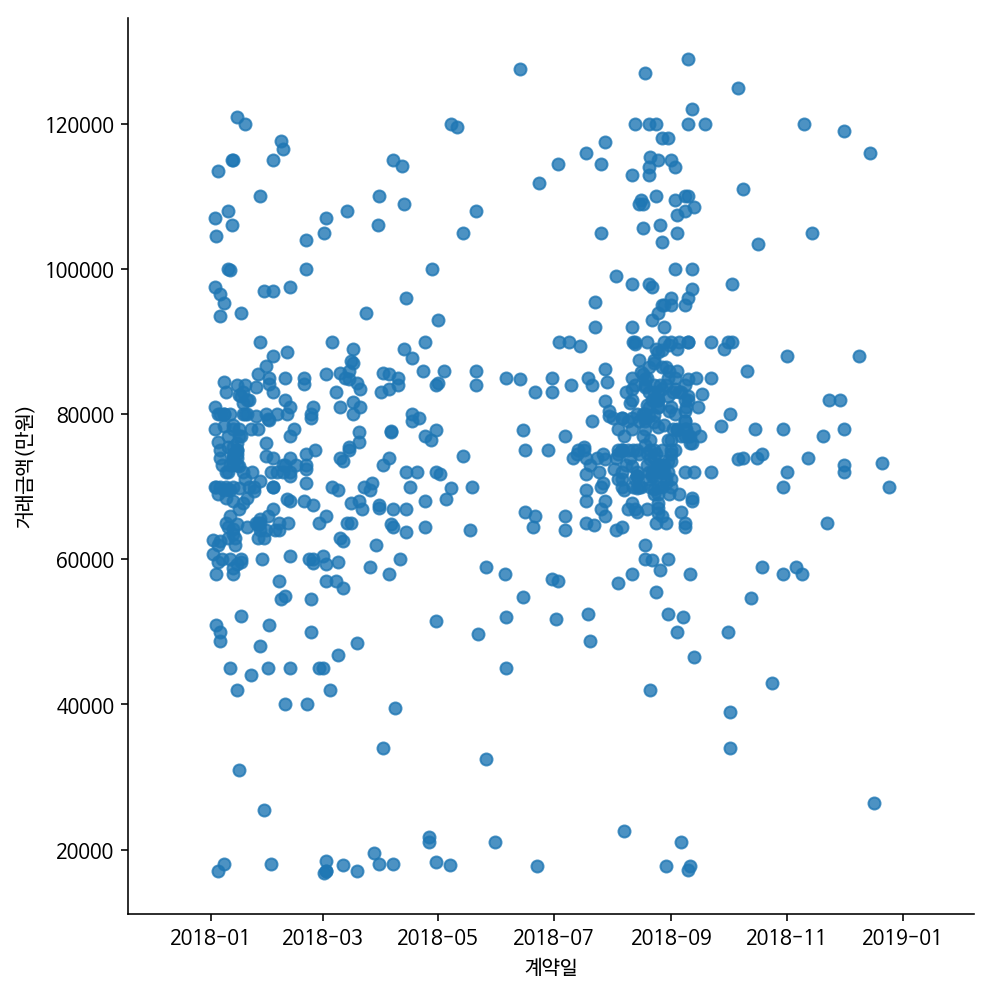

In [ ]:
sns.lmplot(data=df2, x="계약일", y="거래금액(만원)", fit_reg=False, height=7)

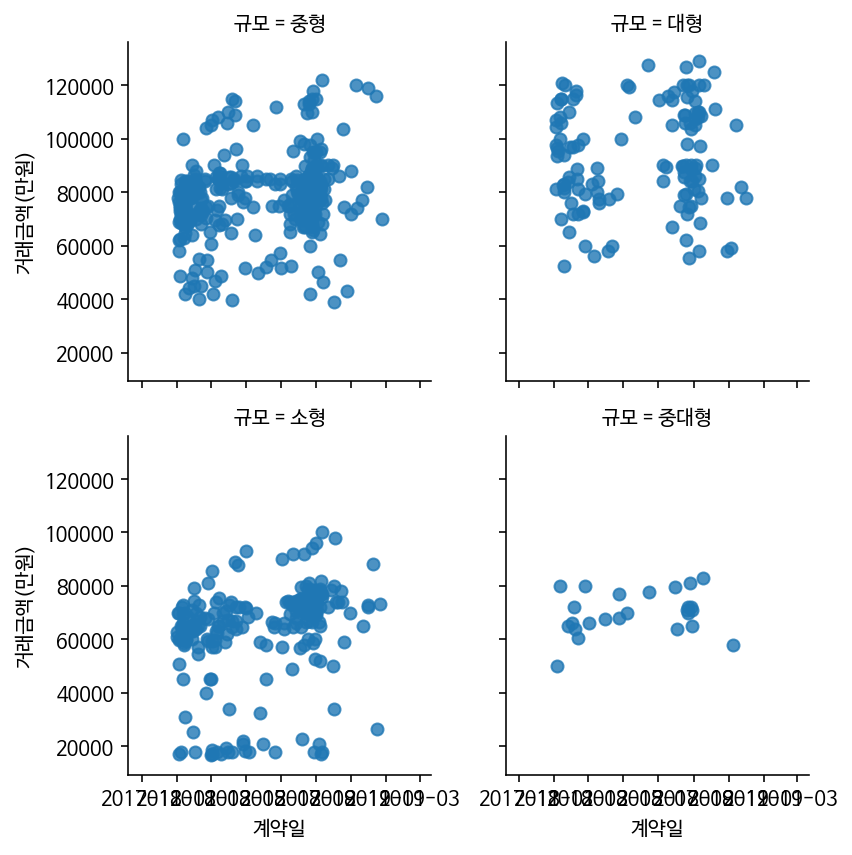

In [ ]:
sns.lmplot(data=df2, x="계약일", y="거래금액(만원)", col="규모", col_wrap=2, height=3, fit_reg=False)

In [ ]:
df.corr()

,본번,부번,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
본번,1.000000,-0.055796,-0.012438,-0.014954,-0.077493,0.024190,0.144148
부번,-0.055796,1.000000,0.022158,0.008271,0.003071,-0.023624,-0.015734
전용면적(㎡),-0.012438,0.022158,1.000000,-0.033607,0.614562,0.122724,0.081166
계약년월,-0.014954,0.008271,-0.033607,1.000000,0.030645,-0.030444,-0.030999
거래금액(만원),-0.077493,0.003071,0.614562,0.030645,1.000000,0.157959,0.040416
층,0.024190,-0.023624,0.122724,-0.030444,0.157959,1.000000,0.175830
건축년도,0.144148,-0.015734,0.081166,-0.030999,0.040416,0.175830,1.000000
